In [1]:
import json
import pandas as pd

from datetime import datetime
from modules.training import split_data, transform_data, get_best_parameters, get_model, evaluate_model

2022-01-22 21:37:13 -> Loading config ...
2022-01-22 21:37:13 -> Loading config done!
2022-01-22 21:37:13 -> Getting dataset ...
2022-01-22 21:37:14 -> Getting dataset done!
2022-01-22 21:37:14 -> Processing features ...
2022-01-22 21:37:14 -> Processing features done!
2022-01-22 21:37:14 -> Tuning model hyperparameters ...
 34%|███████████████████████████████████████████████████████                                                                                                         | 44/128 [50:22<1:36:09, 68.68s/trial, best loss: 1.0426365555773525]
2022-01-22 22:27:36 -> Tuning model hyperparameters done!
2022-01-22 22:27:36 -> Evaluating model ...
RMSE: 1.0472604748701604


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


2022-01-22 22:27:54 -> Evaluating model done!


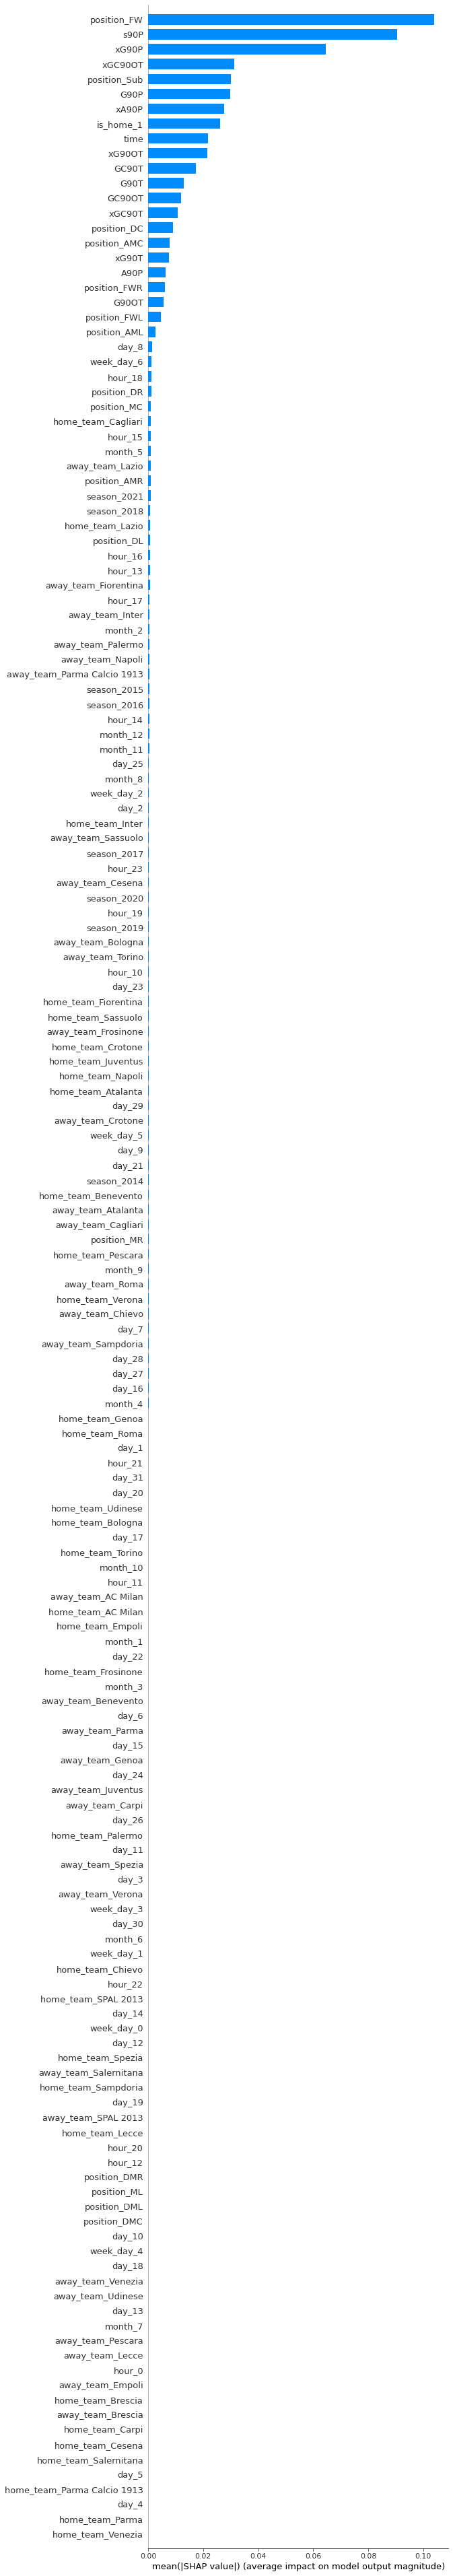

In [2]:
try:
    
    ###############################################################################################
    status = 'Loading config ...'
    print('{} -> {}'.format(datetime.now().strftime('%Y-%m-%d %H:%M:%S'), status))
    with open('config/config.json') as config:
        config = json.load(config)
    status = 'Loading config done!'
    print('{} -> {}'.format(datetime.now().strftime('%Y-%m-%d %H:%M:%S'), status))
    ###############################################################################################
    
    ###############################################################################################
    status = 'Getting dataset ...'
    print('{} -> {}'.format(datetime.now().strftime('%Y-%m-%d %H:%M:%S'), status))
    df = pd.read_csv('data/outputs/dataset_{}_{}.csv'.format(config['seasons'][0], config['seasons'][-1]))
    X_train_raw, X_test_raw, y_train, y_test, metadata_train, metadata_test = split_data(df, metadata_columns=['match_id', 'date', 'player_id', 'player', 'team'])
    status = 'Getting dataset done!'
    print('{} -> {}'.format(datetime.now().strftime('%Y-%m-%d %H:%M:%S'), status))
    ###############################################################################################
    
    ###############################################################################################
    status = 'Processing features ...'
    print('{} -> {}'.format(datetime.now().strftime('%Y-%m-%d %H:%M:%S'), status))
    X_train, X_test = transform_data(X_train_raw=X_train_raw, X_test_raw=X_test_raw, categorical_columns=['home_team', 'away_team', 'is_home', 'season', 'month', 'day', 'hour', 'week_day', 'position'])
    status = 'Processing features done!'
    print('{} -> {}'.format(datetime.now().strftime('%Y-%m-%d %H:%M:%S'), status))
    ###############################################################################################

    ###############################################################################################
    status = 'Tuning model hyperparameters ...'
    print('{} -> {}'.format(datetime.now().strftime('%Y-%m-%d %H:%M:%S'), status))
    best_params = get_best_parameters(X_train, y_train)
    status = 'Tuning model hyperparameters done!'
    print('{} -> {}'.format(datetime.now().strftime('%Y-%m-%d %H:%M:%S'), status))
    ###############################################################################################
    
    ###############################################################################################
    status = 'Evaluating model ...'
    print('{} -> {}'.format(datetime.now().strftime('%Y-%m-%d %H:%M:%S'), status))
    model = get_model(best_params, X_train, y_train)
    evaluate_model(model, X_test, y_test)
    status = 'Evaluating model done!'
    print('{} -> {}'.format(datetime.now().strftime('%Y-%m-%d %H:%M:%S'), status))
    ###############################################################################################
    
except Exception as e:
    print('Exception: {}'.format(e))
    print('Errored out during: {}'.format(status))